In [1]:
import pandas as pd

In [2]:
!pip install langchain langchain-huggingface langchain-groq lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.6/129.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.5 MB/s eta 0:00:00


In [42]:
# 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
# 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
from langchain_groq import ChatGroq
from google.colab import userdata
import getpass
import os

from google.colab import userdata

os.environ["GROQ_API_KEY"] = userdata.get('key1')

In [43]:
#llama3-8b-8192
#mixtral-8x7b-32768 X
#gemma-7b-it
#llama3-70b-8192
#mistral-saba-24b
llm = ChatGroq(
    model="llama3-70b-8192",
    temperature=0,
    max_tokens=500,  # Limit the number of tokens to avoid explanations
    timeout=None,
    max_retries=2)

llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7919eb133c50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7919eb11ed50>, model_name='llama3-70b-8192', temperature=1e-08, model_kwargs={}, groq_api_key=SecretStr('**********'), max_tokens=500)

# lime

In [44]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
import pandas as pd

In [45]:
prompt = PromptTemplate.from_template(
"""
Predict the disease name from the statement: {question}. Provide only the main disease in this format: **disease name** (e.g., converting 'cancer,' to **cancer**). Focus on the primary disease mentioned, not on subtypes or related conditions.
Please note:
    - Some diseases may share symptoms (e.g., Panic Disorder vs Anxiety Disorder, Gastroenteritis vs Food Poisoning, etc,). Distinguish them by their key differences:

Guidelines:
- If no disease is mentioned, return **"No disease detected"**.
- For multiple diseases, choose the most relevant or primary one.
- Ignore non-disease information such as symptoms or conditions without a direct disease name.
- If the disease could fit multiple categories, choose the main disease and ignore subtype variations.
- The response should be strictly between **1 to 5 words**, with no additional information.
"""
)

chain = LLMChain(llm=llm, prompt=prompt)

In [46]:
from lime.lime_text import LimeTextExplainer  # Import the LimeTextExplainer class




In [47]:
def mistral_predict_proba(texts):
    predictions = []
    for text in texts:  # LIME passes multiple texts at once
        response = chain.invoke({"question": text})
        output_text = response.get("text", "").lower()

        # Define simple rule-based mapping (you may improve this)
        if "diabetes" in output_text:
            prob = [0.8, 0.2]  # Example probability for Diabetes
        else:
            prob = [0.2, 0.8]  # Example probability for Not Diabetes

        predictions.append(prob)

    return np.array(predictions)  # LIME expects a NumPy array


In [48]:
from lime.lime_text import LimeTextExplainer
import numpy as np

explainer = LimeTextExplainer(class_names=['Pneumonia', 'Not Pneumonia'])

explanation = explainer.explain_instance(
    """Doctor, I’ve been feeling really sick for the past few days. I have a persistent cough that brings up yellowish mucus, and my chest hurts whenever I breathe or cough.I’ve also had a fever, chills, and I feel extremely tired all the time. Sometimes, I feel short of breath even when I’m just resting. My appetite has decreased, and I’ve been sweating a lot at night. Could this be something serious?""",
    mistral_predict_proba,  # Use the updated function
    num_features=10,
    num_samples=10
)

explanation.show_in_notebook()  # Show explanation


In [49]:
explanation.save_to_file("lime_explanation.html")


## dynamic lable name

In [50]:
import pandas as pd
import numpy as np
from lime.lime_text import LimeTextExplainer

# Example input text as a list
input_texts = [
    """Patient:
Doctor, my mood has been all over the place. Sometimes, I feel extremely energetic, like I can do anything, and I don’t even need much sleep. My mind races with so many ideas, and I feel unstoppable. But then, out of nowhere, I crash.

During these lows, I feel completely drained, hopeless, and lose interest in everything. Even getting out of bed feels like a struggle. My sleep patterns are all over the place—sometimes I barely sleep, and other times I sleep too much.

I’ve also been making impulsive decisions when I’m feeling high, like spending too much money or talking too fast without thinking. But when the low hits, I regret everything and feel like I’m stuck in a deep hole. I don’t understand why this keeps happening. Could there be something wrong with me?"""
]

# Example chain — assumed already initialized
# chain = LLMChain(llm=llm, prompt=prompt)

# Function to get disease prediction from LLM
def mistral_predict(text):
    response = chain.invoke({"question": text})
    return response.get("text", "").strip()

# Function to extract disease name from LLM response
def extract_disease(output_text):
    output_text = output_text.strip("**")  # Remove markdown formatting

    if output_text.lower() == "no disease detected":
        return "No Disease"

    return output_text  # Return disease name



In [51]:
# Function to get probability predictions for LIME
def mistral_predict_proba(texts):
    predictions = []
    for text in texts:
        predicted_disease = extract_disease(mistral_predict(text))

        # Set probabilities
        if predicted_disease == "No Disease":
            prob = [0.5, 0.5]
        else:
            prob = [0.8, 0.2]

        predictions.append(prob)

    return np.array(predictions)



In [52]:
# Loop through each text and generate LIME explanations
for text in input_texts:
    predicted_disease = extract_disease(mistral_predict(text))

    # Set class labels dynamically
    class_labels = [predicted_disease, f"Non-{predicted_disease}"]

    # Initialize LIME explainer
    explainer = LimeTextExplainer(class_names=class_labels)

    # Explain instance
    explanation = explainer.explain_instance(
        text,
        mistral_predict_proba,
        num_features=5,
        num_samples=10
    )

    # Display explanation in notebook
    explanation.show_in_notebook()

    # If you only want first text, break is fine; otherwise, remove this line
    break


# COT Lime testing

In [31]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00


In [53]:

from langchain_groq import ChatGroq
import getpass
import os


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from lime.lime_text import LimeTextExplainer
from langchain import PromptTemplate, LLMChain
from langchain.chat_models import ChatOpenAI  # Use Groq AI if available
from google.colab import userdata


from langchain import PromptTemplate, LLMChain

# Initialize Groq AI model
llm = ChatGroq(
    api_key=userdata.get('key2'),  # Replace with your actual API key
    model_name="llama3-70b-8192"   # Use LLaMA-3 70B model
)

In [55]:
# Create the LangChain pipeline
cot_prompt = PromptTemplate(
    input_variables=["history", "symptoms"],
    template=(
        "Symptoms: {symptoms}\n\n"
        "Please perform the following steps:\n"
        "1. Identify potential conditions related to the history and symptoms.\n"
        "2. Explain which keywords or features are most indicative.\n"
        "3. Discuss differential diagnoses and rule out less likely conditions.\n"
        "4. Conclude with the most likely disease prediction.\n\n"
        "Provide a detailed chain-of-thought explanation."
        "then state the final predicted disease and main keywords or features strictly in json format."
    )
)


llm_chain = LLMChain(llm=llm, prompt=cot_prompt)

# Example user input: medical history and symptoms.

# user_symptoms = """Doctor, I've been feeling really off lately. I’ve been extremely thirsty all the time, no matter how much water I drink. And I feel like I’m running to the bathroom way more than usual, especially at night.

# Also, I get really tired throughout the day, even after a full night’s sleep. My vision has been a bit blurry, and sometimes I feel lightheaded. I even noticed that small cuts and wounds are taking longer to heal than they used to.

# Oh, and one more thing—I’ve lost some weight without trying, but I feel hungrier than usual. Could this be something serious?"""



user_symptoms = """Patient:
Doctor, I don’t feel like myself lately. I’ve been feeling really down for weeks now, and it’s hard to explain exactly why. Nothing seems to make me happy anymore—even the things I used to enjoy.

I feel tired all the time, even if I’ve had enough sleep. Sometimes I just lie in bed with no motivation to get up or do anything. I’ve been avoiding friends and family because I don’t feel like talking.

My appetite has changed too—some days I barely eat, and other times I eat too much just to feel something. I’ve been having trouble concentrating, and I keep having negative thoughts about myself and my life.

Sometimes I wonder if things will ever get better. I don’t know what’s wrong with me, but I don’t want to feel like this anymore.
"""
# Generate the LLM response including CoT explanation and final prediction.
llm_response = llm_chain.run({
    "symptoms": user_symptoms
})

print("LLM Explanation & Prediction:\n", llm_response)

# -----------------------------
# 2️⃣ Extract Predicted Disease Dynamically
# -----------------------------
def extract_disease_key(response: str) -> str:
   test = response.split("```")[1].split("```")[0].strip().replace('json',"")
   predicted_disease = eval(test)[list(eval(test).keys())[0]]
   key = eval(test)[list(eval(test).keys())[1]]
   return predicted_disease,key


disease_and_key = extract_disease_key(llm_response)
print("Extracted Predicted Disease:", disease_and_key[0])
print("Extracted key features:", disease_and_key[1])

LLM Explanation & Prediction:
 Here's the detailed chain-of-thought explanation:

**Step 1: Identify potential conditions related to the history and symptoms**

The patient presents with a range of symptoms, including depressed mood, anhedonia (loss of pleasure), fatigue, changes in appetite, and social withdrawal. These symptoms are consistent with several mental health conditions, including depressive disorders, anxiety disorders, and adjustment disorders.

**Step 2: Explain which keywords or features are most indicative**

The most indicative features are:

* Depressed mood (feeling down, loss of pleasure)
* Anhedonia (not enjoying activities, feeling unmotivated)
* Changes in appetite (eating too little or too much)
* Social withdrawal (avoiding friends and family)
* Negative self-talk and thoughts (wondering if things will ever get better)

These features are highly suggestive of a depressive episode.

**Step 3: Discuss differential diagnoses and rule out less likely conditions**


In [58]:
import re
step_2_text = llm_response.split("Step 2:")[1].split("Step 3:")[0].strip()

# Extract Step 3 section
step_3_text = llm_response.split("Step 3:")[1].split("Step 4:")[0].strip().strip()

# Extract bullet points from both sections
features = [line.strip("* ").strip() for line in step_2_text.split("\n") if line.startswith("*")]
# differential_diagnoses = [line.strip("* ").strip() for line in step_3_text.split("\n") if line.startswith("*")]

cleaned_step_3_text = re.sub(r"^.*?\*\*\n", "", step_3_text, flags=re.DOTALL).strip()
cleaned_step_3_text = re.sub(r"\*\*$", "", cleaned_step_3_text).strip()


# Combine both sections into a single list if needed
all_extracted = features + [cleaned_step_3_text]

# all_extracted

single_line_text = " ".join(filter(None, all_extracted))
single_line_text

"Depressed mood (feeling down, loss of pleasure) Anhedonia (not enjoying activities, feeling unmotivated) Changes in appetite (eating too little or too much) Social withdrawal (avoiding friends and family) Negative self-talk and thoughts (wondering if things will ever get better) Differential diagnoses to consider include:\n\n* Adjustment Disorder: This diagnosis is possible, given the patient's recent struggles with motivation and pleasure. However, the patient's symptoms do not seem to be directly related to a recent life change or stressor.\n* Anxiety Disorder: Anxiety can present with similar symptoms, including fatigue, changes in appetite. However, the patient's primary complaint is a depressed mood and anhedonia, which is more consistent with a depressive disorder.\n* Bipolar Disorder: While the patient's symptoms could be consistent with a depressive episode, there is no mention of previous manic or hypomanic episodes, making this diagnosis less likely."

In [59]:
import json
import re

# Define the prompt template
template = """
Given the following disease and its key features, assign a weight score between 0 and 1 to each key feature based on its contribution to the disease.
The sum of all assigned weights should be exactly 1.

Disease: {disease}

Key Features:
{features}

Return the results in json with no extra content.
"""

prompt = PromptTemplate(template=template, input_variables=["disease", "features"])

# Set up the LLMChain with the Groq AI model
chain = LLMChain(llm=llm, prompt=prompt)

# Run the chain to get the weighted scores
result = chain.run(disease=disease_and_key[0], features=disease_and_key[1])


# Extract JSON using regex
match = re.search(r"\{\s*[\s\S]*?\s*\}", result)
if match:
    json_text = match.group(0)
    try:
        scores_dict = json.loads(json_text)
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", e)
        scores_dict = {}
else:
    print("No valid JSON found!")
    scores_dict = {}

# Normalize scores to ensure they sum to exactly 1
total = sum(scores_dict.values())
if total != 1:
    scores_dict = {key: round(value / total, 4) for key, value in scores_dict.items()}  # Normalize and round to 4 decimals

# Print normalized scores for debugging
print(json.dumps(scores_dict, indent=2))

# Sort scores in descending order
sorted_items = sorted(scores_dict.items(), key=lambda x: x[1], reverse=True)
features, scores = zip(*sorted_items)

{
  "anhedonia": 0.2,
  "depressed mood": 0.3,
  "fatigue": 0.1,
  "changes in appetite": 0.05,
  "withdrawal": 0.1,
  "negative self-talk": 0.25
}


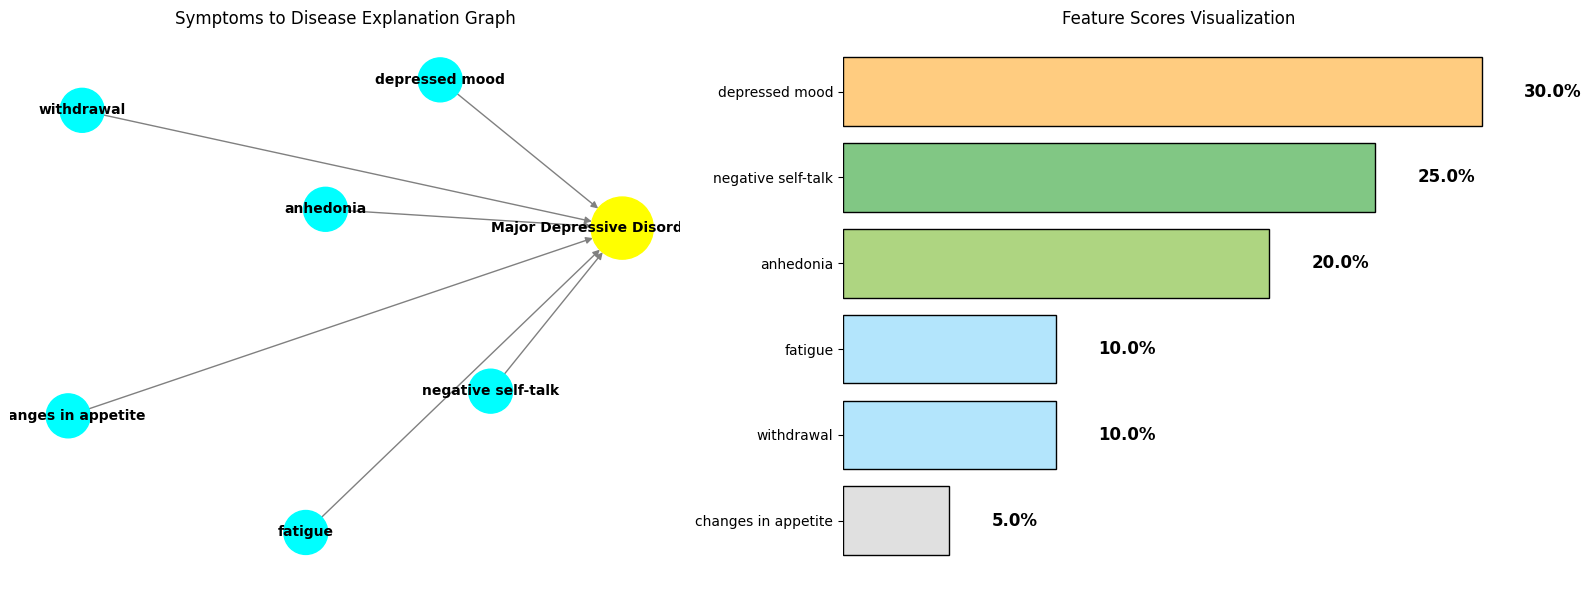

In [60]:
import json
import re
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, HTML # import HTML here



extracted_disease = disease_and_key[0]

# --- CSS Styles for Highlighting ---
css_styles = """
<style>
    body { font-family: Arial, sans-serif; line-height: 1.6; }
    /* Define CSS classes for various score ranges */
    .score-high { background-color: #FF0000; color: #fff; font-weight: bold; padding: 2px 4px; border-radius: 3px; }       /* >= 0.25 */
    .score-med-high { background-color: #FF7F50; color: #fff; padding: 2px 4px; border-radius: 3px; }                  /* >= 0.2 */
    .score-med { background-color: #FFA500; color: #fff; padding: 2px 4px; border-radius: 3px; }                       /* >= 0.15 */
    .score-low { background-color: #FFFF00; color: #000; padding: 2px 4px; border-radius: 3px; }                       /* >= 0.1 */
    .score-verylow { background-color: #FFFFE0; color: #000; padding: 2px 4px; border-radius: 3px; }                   /* below 0.1 */
</style>
"""
# ---------------------------
# Helper Function: Color Mapping for Bar Chart
# ---------------------------


def get_bar_color(score):
    if score >= 0.5:
        return "#F57C00"  # Strong Pumpkin Orange
    elif score >= 0.4:
        return "#FB8C00"  # Deep Burnt Orange
    elif score >= 0.35:
        return "#FFA726"  # Amber-Orange
    elif score >= 0.3:
        return "#FFCC80"  # Soft Orange
    elif score >= 0.25:
        return "#81C784"  # Neutral Soft Green
    elif score >= 0.2:
        return "#AED581"  # Light Green-Yellow Tint
    elif score >= 0.15:
        return "#81D4FA"  # Slightly Low - Sky Blue
    elif score >= 0.1:
        return "#B3E5FC"  # Very Low - Pale Sky Blue
    else:
        return "#E0E0E0"  # Near Zero - Light Gray





bar_colors = [get_bar_color(score) for score in scores]

# --- Highlight Key Features in the Context ---
highlighted_text = single_line_text

for feature, score in scores_dict.items():
    css_class = get_bar_color(score)
    # Replace each occurrence of the feature (case-insensitive) with an HTML span having the corresponding CSS class.
    pattern = re.compile(re.escape(feature), re.IGNORECASE)
    replacement = f'<span style="background-color: {css_class}; color: #000; font-weight: bold; padding: 2px 4px; border-radius: 3px;">{feature}</span>'
    highlighted_text = pattern.sub(replacement, highlighted_text)

# --- Combine CSS and Highlighted Text into an HTML Block ---
html_output = f"""
{css_styles}
<h2>My XAI Visualization </h2>
<div>{highlighted_text}</div>
"""

# --- Display the HTML ---

display(HTML(html_output))

# ---------------------------
# Create the Side-by-Side Plot Function
# ---------------------------
def plot_explanation_graph_side_by_side(scores, disease):
    """
    Plots a directed graph (networkx) on the left and a horizontal bar chart on the right,
    using the provided scores and disease.
    """
    # Create a figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), facecolor="none")

    # ---------------------------
    # Left: Directed Graph using NetworkX
    # ---------------------------
    G = nx.DiGraph()
    # Add disease node
    G.add_node(disease, color='yellow', size=2000)
    # Add each symptom node and an edge from symptom to disease (with weight info)
    for symptom, weight in scores.items():
        G.add_node(symptom, color='cyan', size=1000)
        G.add_edge(symptom, disease, weight=weight)
    # Get node properties
    node_colors = [G.nodes[node]['color'] for node in G.nodes]
    node_sizes  = [G.nodes[node]['size'] for node in G.nodes]
    # Compute layout and draw graph in the first subplot
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes,
            edge_color='gray', font_size=10, font_weight='bold', ax=axes[0])
    axes[0].set_title("Symptoms to Disease Explanation Graph")

    # ---------------------------
    # Right: Horizontal Bar Chart
    # ---------------------------
    # Sort scores in descending order for better visualization
    sorted_items = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    bar_features, bar_scores = zip(*sorted_items)
    # Map colors
    bar_colors = [get_bar_color(s) for s in bar_scores]

    # Plot horizontal bar chart in second subplot
    bars = axes[1].barh(bar_features, bar_scores, color=bar_colors, edgecolor='black')

    # Add percentage labels to each bar
    for bar, score in zip(bars, bar_scores):
        axes[1].text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2,
                     f"{score*100:.1f}%",
                     va="center", ha="left", fontsize=12, color="black", fontweight="bold")

    axes[1].invert_yaxis()  # Highest score at the top
    axes[1].set_title("Feature Scores Visualization")
    axes[1].set_xlabel("Score")
    # axes[1].set_ylabel("Feature")

    # Optionally, remove x-axis for a cleaner look:
    axes[1].xaxis.set_visible(False)

    # Remove spines for both subplots for a cleaner look
    for ax in axes:
        for spine in ax.spines.values():
            spine.set_visible(False)

    plt.tight_layout()

    plt.show()

# ---------------------------
# Call the function with your scores and extracted disease
# ---------------------------
plot_explanation_graph_side_by_side(scores_dict, extracted_disease)


## my XAI

In [40]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.1 MB/s eta 0:00:00


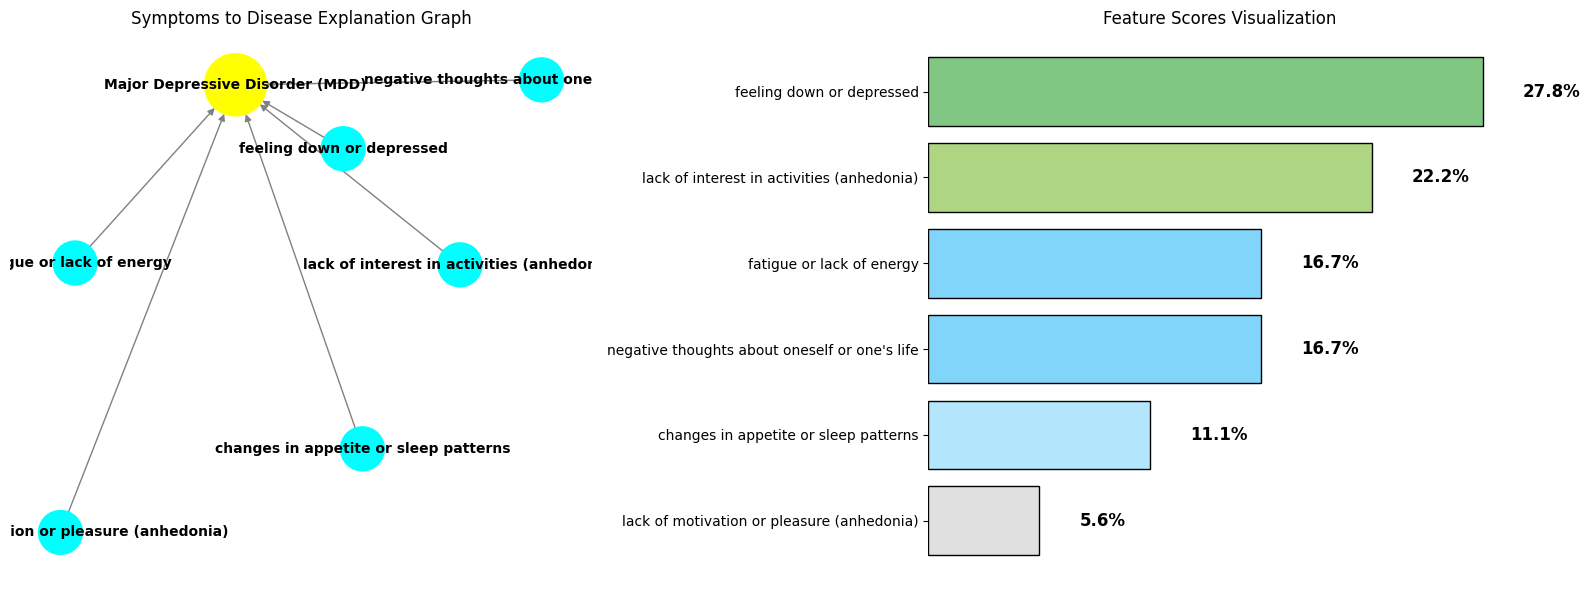

In [41]:
import re
import json
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, HTML
from rapidfuzz import fuzz

# --------------------------
# [Your existing LLM response parsing and JSON extraction code]
# --------------------------

step_2_text = llm_response.split("Step 2:")[1].split("Step 3:")[0].strip()

# Extract Step 3 section
step_3_text = llm_response.split("Step 3:")[1].split("Step 4:")[0].strip().strip()

# Extract bullet points from Step 2
features = [line.strip("* ").strip() for line in step_2_text.split("\n") if line.startswith("*")]

# Clean up Step 3 text (if needed)
cleaned_step_3_text = re.sub(r"^.*?\*\*\n", "", step_3_text, flags=re.DOTALL).strip()
cleaned_step_3_text = re.sub(r"\*\*$", "", cleaned_step_3_text).strip()

# Combine both sections into a single list if needed
all_extracted = features + [cleaned_step_3_text]
single_line_text = " ".join(filter(None, all_extracted))

# --------------------------
# Dictionary Score Calculation (LLMChain) [Your existing code]
# --------------------------

template = """
Given the following disease and its key features, assign a weight score between 0 and 1 to each key feature based on its contribution to the disease.
The sum of all assigned weights should be exactly 1.

Disease: {disease}

Key Features:
{features}

Return the results in json with no extra content.
"""

prompt = PromptTemplate(template=template, input_variables=["disease", "features"])
chain = LLMChain(llm=llm, prompt=prompt)
result = chain.run(disease=disease_and_key[0], features=disease_and_key[1])

match = re.search(r"\{\s*[\s\S]*?\s*\}", result)
if match:
    json_text = match.group(0)
    try:
        scores_dict = json.loads(json_text)
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", e)
        scores_dict = {}
else:
    print("No valid JSON found!")
    scores_dict = {}

total = sum(scores_dict.values())
if total != 1:
    scores_dict = {key: round(value / total, 4) for key, value in scores_dict.items()}

# print(json.dumps(scores_dict, indent=2))

sorted_items = sorted(scores_dict.items(), key=lambda x: x[1], reverse=True)
features, scores = zip(*sorted_items)
extracted_disease = disease_and_key[0]

# --------------------------
# Helper Functions for Fuzzy Matching
# --------------------------

def find_best_match(context, feature, threshold=80):
    """
    Finds the best matching substring within context for a given feature using a sliding window.
    Returns the substring if the similarity (using fuzz.partial_ratio) meets the threshold.
    """
    words = context.split()
    feature_words = feature.split()
    n = len(feature_words)
    best_match = None
    best_score = 0
    # Iterate over possible windows of n words in context
    for i in range(len(words) - n + 1):
        candidate = " ".join(words[i:i+n])
        score = fuzz.partial_ratio(candidate.lower(), feature.lower())
        if score > best_score:
            best_score = score
            best_match = candidate
    if best_score >= threshold:
        return best_match
    return None

def fuzzy_highlight_substring(context, feature, score, threshold=80):
    """
    Uses fuzzy matching to find the best matching substring for feature in context.
    If a match is found (above threshold), replaces that substring with a highlighted version.
    """
    match = find_best_match(context, feature, threshold)
    if match:
        replacement = f'<span style="background-color: {get_bar_color(score)}; color: #000; font-weight: bold; padding: 2px 4px; border-radius: 3px;">{match}</span>'
        # Use re.escape to ensure special characters in match are handled correctly
        context = re.sub(re.escape(match), replacement, context, flags=re.IGNORECASE)
    return context

# --------------------------
# Helper Function for Color Mapping for Bar Chart
# --------------------------

def get_bar_color(score):
    if score >= 0.5:
        return "#F57C00"
    elif score >= 0.4:
        return "#FB8C00"
    elif score >= 0.35:
        return "#FFA726"
    elif score >= 0.3:
        return "#FFCC80"
    elif score >= 0.25:
        return "#81C784"
    elif score >= 0.2:
        return "#AED581"
    elif score >= 0.15:
        return "#81D4FA"
    elif score >= 0.1:
        return "#B3E5FC"
    else:
        return "#E0E0E0"

# --------------------------
# CSS Styles for Highlighting
# --------------------------

css_styles = """
<style>
    body { font-family: Arial, sans-serif; line-height: 1.6; }
    .score-high { background-color: #FF0000; color: #fff; font-weight: bold; padding: 2px 4px; border-radius: 3px; }
    .score-med-high { background-color: #FF7F50; color: #fff; padding: 2px 4px; border-radius: 3px; }
    .score-med { background-color: #FFA500; color: #fff; padding: 2px 4px; border-radius: 3px; }
    .score-low { background-color: #FFFF00; color: #000; padding: 2px 4px; border-radius: 3px; }
    .score-verylow { background-color: #FFFFE0; color: #000; padding: 2px 4px; border-radius: 3px; }
</style>
"""

# --------------------------
# Highlighting Loop Using Fuzzy Matching
# --------------------------

highlighted_text = single_line_text  # original context text

for feature, score in scores_dict.items():
    highlighted_text = fuzzy_highlight_substring(highlighted_text, feature, score, threshold=80)

html_output = f"""
{css_styles}
<h2>My XAI Visualization</h2>
<div>{highlighted_text}</div>
"""

display(HTML(html_output))

# --------------------------
# Side-by-Side Plot Function (unchanged)
# --------------------------

def plot_explanation_graph_side_by_side(scores, disease):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), facecolor="none")
    G = nx.DiGraph()
    G.add_node(disease, color='yellow', size=2000)
    for symptom, weight in scores.items():
        G.add_node(symptom, color='cyan', size=1000)
        G.add_edge(symptom, disease, weight=weight)
    node_colors = [G.nodes[node]['color'] for node in G.nodes]
    node_sizes  = [G.nodes[node]['size'] for node in G.nodes]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes,
            edge_color='gray', font_size=10, font_weight='bold', ax=axes[0])
    axes[0].set_title("Symptoms to Disease Explanation Graph")
    sorted_items = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    bar_features, bar_scores = zip(*sorted_items)
    bar_colors = [get_bar_color(s) for s in bar_scores]
    bars = axes[1].barh(bar_features, bar_scores, color=bar_colors, edgecolor='black')
    for bar, score in zip(bars, bar_scores):
        axes[1].text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2,
                     f"{score*100:.1f}%",
                     va="center", ha="left", fontsize=12, color="black", fontweight="bold")
    axes[1].invert_yaxis()
    axes[1].set_title("Feature Scores Visualization")
    axes[1].set_xlabel("Score")
    axes[1].xaxis.set_visible(False)
    for ax in axes:
        for spine in ax.spines.values():
            spine.set_visible(False)
    plt.tight_layout()
    plt.show()

plot_explanation_graph_side_by_side(scores_dict, extracted_disease)
